# Cache everything in the Redis!

In [4]:
from datetime import datetime
import configparser
import json
import redis
from PIL import Image
import io
import utils

In [5]:
config = configparser.ConfigParser()
config.read('config_localhost.ini')


thumbnail_cache = redis.StrictRedis(
    host=config["redis"]["host"],
    port=config["redis"]["port"],
    db=config["redis"]["thumb"],
)
xxhash_cache = redis.StrictRedis(
    host=config["redis"]["host"],
    port=config["redis"]["port"],
    db=config["redis"]["xxhash"],
)

In [6]:
def get_thumbnail(img_path, size = (255, 255)):
    if isinstance(img_path, bytes):
        img_path=img_path.decode("UTF-8")
    
    img = Image.open(img_path)
    img.thumbnail(size)
    with io.BytesIO() as buffer:
        img.save(buffer, format="jpeg")
        thumbnail = buffer.getvalue()
    return thumbnail

def cache_thumbnail_redis(img_path, size = (255, 255)):
    if isinstance(img_path, bytes):
        img_path=img_path.decode("UTF-8")
    
    xxhash = utils.cache_xxhash(img_path)
    
    if thumbnail_cache.exists(xxhash):
        # Do nothing, thumbnail cache already exists.
        return None

    thumbnail = get_thumbnail(img_path=img_path, size=size)
    return thumbnail_cache.set(xxhash, thumbnail)

In [7]:
cache_thumbnail_redis()

TypeError: cache_thumbnail_redis() missing 1 required positional argument: 'img_path'

In [19]:
xxhash = xxhash_cache.get("/net/8600k.local/vault/pictures/College/Purdue/PESC/PESC CE2005/Jed's Pictures/2002Jan01_084432.jpg")
xxhash

b'f823233ad32f345e'

In [20]:
thumbnail=thumbnail_cache.get(xxhash)

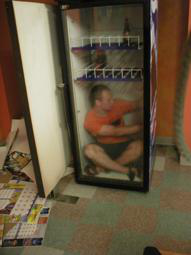

In [21]:
Image.open(io.BytesIO(thumbnail))

In [22]:
import redis_db

In [23]:
media_file="/net/8600k.local/vault/pictures/College/Purdue/PESC/PESC CE2005/Jed's Pictures/2002Jan01_084432.jpg"

In [24]:
redis_db.xxhash.exists(media_file)

True

'f823233ad32f345e'